<a href="https://colab.research.google.com/github/Luke-Williams-01/Luke-Williams-01/blob/main/Project_Data_analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import simps, romb

In [2]:
# Reading in the data
# Phase: -28, 15/02/17
A, F, E, G = np.loadtxt('Combined0217.txt', usecols= [0,1,2,3], unpack = True, skiprows = 1, dtype = float)
A1 = np.array_split(A, (len(A)/3))
F1 = np.array_split(F, (len(F)/3))
E1 = np.array_split(E, (len(E)/3))
G1 = np.array_split(G, (len(G)/3))
# Phase: -20, 15/02/25
A, F, E, G = np.loadtxt('Combined0225.txt', usecols= [0,1,2,3], unpack = True, skiprows = 1, dtype = float)
A2 = np.array_split(A, (len(A)/3))
F2 = np.array_split(F, (len(F)/3))
E2 = np.array_split(E, (len(E)/3))
G2 = np.array_split(G, (len(G)/3))
# Phase: -8, 15/03/11
A, F, E, G = np.loadtxt('Combined0311.txt', usecols= [0,1,2,3], unpack = True, skiprows = 1, dtype = float)
A3 = np.array_split(A, (len(A)/3))
F3 = np.array_split(F, (len(F)/3))
E3 = np.array_split(E, (len(E)/3))
G3 = np.array_split(G, (len(G)/3))
# Phase: -2, 15/03/18
A, F, E, G = np.loadtxt('Combined0318.txt', usecols= [0,1,2,3], unpack = True, skiprows = 1, dtype = float)
A4 = np.array_split(A, (len(A)/3))
F4 = np.array_split(F, (len(F)/3))
E4 = np.array_split(E, (len(E)/3))
G4 = np.array_split(G, (len(G)/3))
# Phase: +7, 15/03/27
A, F, E, G = np.loadtxt('Combined0327.txt', usecols= [0,1,2,3], unpack = True, skiprows = 1, dtype = float)
A5 = np.array_split(A, (len(A)/3))
F5 = np.array_split(F, (len(F)/3))
E5 = np.array_split(E, (len(E)/3))
G5 = np.array_split(G, (len(G)/3))
# Phase: +20, 15/04/11
A, F, E, G = np.loadtxt('Combined0411.txt', usecols= [0,1,2,3], unpack = True, skiprows = 1, dtype = float)
A6 = np.array_split(A, (len(A)/3))
F6 = np.array_split(F, (len(F)/3))
E6 = np.array_split(E, (len(E)/3))
G6 = np.array_split(G, (len(G)/3))

# 'Time' Array (Phase)
T = np.array([-28, -20, -8, -2, 7, 20])
# Time Array (seconds, where -28 corresponds to 0 seconds)
t = np.array([0, 754400, 1900800, 2505600, 3283200, 4579200])

In [3]:
# Mean wavelength for each absorption trough for each dataset
W0217 = np.mean(A1, axis = 1)
W0225 = np.mean(A2, axis = 1)
W0311 = np.mean(A3, axis = 1)
W0318 = np.mean(A4, axis = 1)
W0327 = np.mean(A5, axis = 1)
W0411 = np.mean(A6, axis = 1)
# Mean flux for each absorption trough for each dataset
F0217 = np.mean(F1, axis = 1)
F0225 = np.mean(F2, axis = 1)
F0311 = np.mean(F3, axis = 1)
F0318 = np.mean(F4, axis = 1)
F0327 = np.mean(F5, axis = 1)
F0411 = np.mean(F6, axis = 1)
# Mean equivalent width for each absorption trough for each dataset
E0217 = np.mean(E1, axis = 1)
E0225 = np.mean(E2, axis = 1)
E0311 = np.mean(E3, axis = 1)
E0318 = np.mean(E4, axis = 1)
E0327 = np.mean(E5, axis = 1)
E0411 = np.mean(E6, axis = 1)
# Mean full-width half maximum for each absorption trough for each dataset
G0217 = np.mean(G1, axis = 1)
G0225 = np.mean(G2, axis = 1)
G0311 = np.mean(G3, axis = 1)
G0318 = np.mean(G4, axis = 1)
G0327 = np.mean(G5, axis = 1)
G0411 = np.mean(G6, axis = 1)

In [38]:
# Error calculations for absoprtion spectra
# Finding standard deviation:
print(A1)
print(A2)
print(A3)
print(A4)
print(A5)
print(A6)

[array([3847.21, 3848.07, 3846.92]), array([4008.3 , 4005.86, 4008.36]), array([4274.14, 4273.41, 4273.56]), array([4522.89, 4523.79, 4519.8 ]), array([4815.51, 4817.68, 4819.43]), array([5003.77, 4999.05, 5004.17]), array([5576.02, 5588.41, 5587.51]), array([6176.74, 6167.44, 6172.24]), array([6377.71, 6380.02, 6378.3 ]), array([7538.64, 7521.22, 7528.83])]
[array([3654.67, 3655.29, 3654.88]), array([3851.86, 3852.13, 3851.83]), array([4011.66, 4013.53, 4013.77]), array([4288.77, 4283.68, 4286.23]), array([4519.65, 4517.23, 4520.31]), array([4821.83, 4821.85, 4821.52]), array([5015.43, 5013.45, 5010.85]), array([5580.74, 5578.14, 5574.72]), array([6186.24, 6184.72, 6183.7 ]), array([6387.78, 6383.87, 6386.5 ]), array([7552.72, 7552.6 , 7551.55])]
[array([3664.66, 3666.96, 3663.93]), array([3871.6 , 3875.22, 3873.51]), array([4021.47, 4021.21, 4021.09]), array([4283.73, 4294.78, 4289.65]), array([4527.39, 4531.71, 4526.99]), array([4823.16, 4820.86, 4823.27]), array([5021.23, 5026.41, 

In [4]:
# Loading the files to plot the spectra evolution for SN2015bn
x217, y217 = np.loadtxt('20150217RER.txt',unpack = True,  dtype = float)
x225, y225 = np.loadtxt('20150225RER.txt',unpack = True,  dtype = float)
x311, y311 = np.loadtxt('20150311RER.txt',unpack = True,  dtype = float)
x318, y318 = np.loadtxt('20150318RER.txt',unpack = True,  dtype = float)
x327, y327 = np.loadtxt('20150327RRE.txt',unpack = True,  dtype = float)
x411, y411 = np.loadtxt('20150411RER.txt',unpack = True,  dtype = float)

plt.figure(figsize = (15,10))
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')

plt.plot(x217, y217, 'k', label='')
plt.plot(x225, y225, 'b')
plt.plot(x311, y311, 'g')
plt.plot(x318, y318, 'r')
plt.plot(x327, y327, 'y')
plt.plot(x411, y411, 'c')
;

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


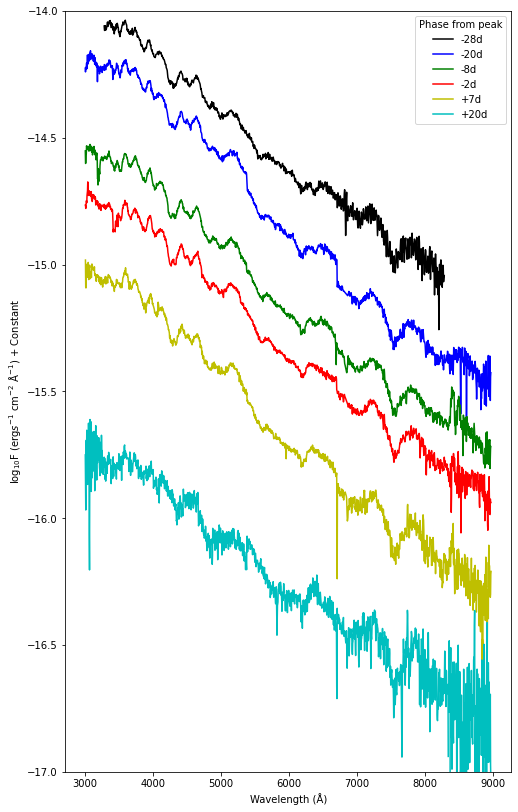

In [6]:
plt.figure(figsize = (8,14))
plt.xlabel('Wavelength (Å)')
plt.ylabel('log$_{10}$F (erg$s^{-1}$ cm$^{-2}$ Å$^{-1}$) + Constant')

plt.plot(x217, np.log10(y217)+0.75, 'k', label= '-28d')
plt.plot(x225, np.log10(y225)+0.5, 'b', label= '-20d')
plt.plot(x311, np.log10(y311), 'g', label= '-8d')
plt.plot(x318, np.log10(y318), 'r', label= '-2d')
plt.plot(x327, np.log10(y327)-0.25, 'y', label= '+7d')
plt.plot(x411, np.log10(y411)-0.5, 'c', label= '+20d')
plt.ylim(-17,-14)
plt.legend(title='Phase from peak', loc='best');

In [7]:
# Velocity calculation for each absorption trough for each dataset
# Where lmb0 - Mean absorption wavelength, lmb1 - lab rest frame wavelength
RestW = np.loadtxt('RestFrame.txt',usecols= [1], unpack = True, skiprows = 1)
def velfunc(lmb0, lmb1):
    return ((np.abs(lmb0 - lmb1))/lmb1) * 3e5
# Phase: -28, 15/02/17
OII0217 = velfunc(W0217[1], RestW[3])
MgI0217 = velfunc(W0217[2], RestW[4])
FeIIa0217 = velfunc(W0217[4], RestW[5])
SiII0217 = velfunc(W0217[7], RestW[10])
OI0217 = velfunc(W0217[9], RestW[13])
# Phase: -20, 15/02/25
OII0225 = velfunc(W0225[2], RestW[3])
MgI0225 = velfunc(W0225[3], RestW[4])
FeIIa0225 = velfunc(W0225[5], RestW[5])
SiII0225 = velfunc(W0225[8], RestW[10])
OI0225 = velfunc(W0225[10], RestW[13])
# Phase: -8, 15/03/11
OII0311 = velfunc(W0311[2], RestW[3])
MgI0311 = velfunc(W0311[3], RestW[4])
FeIIa0311 = velfunc(W0311[5], RestW[5])
SiII0311 = velfunc(W0311[8], RestW[10])
OI0311 = velfunc(W0311[11], RestW[13])
# Phase: -2, 15/03/18
OII0318 = velfunc(W0318[2], RestW[3])
MgI0318 = velfunc(W0318[3], RestW[4])
FeIIa0318 = velfunc(W0318[5], RestW[5])
SiII0318 = velfunc(W0318[8], RestW[10])
OI0318 = velfunc(W0318[10], RestW[13])
# Phase: +7, 15/03/27
OII0327 = velfunc(W0327[2], RestW[3])
MgI0327 = velfunc(W0327[3], RestW[4])
FeIIa0327 = velfunc(W0327[4], RestW[5])
SiII0327 = velfunc(W0327[8], RestW[10])
OI0327 = velfunc(W0327[10], RestW[13])
# Phase: +20, 15/04/11
OII0411 = velfunc(W0411[2], RestW[3])
MgI0411 = velfunc(W0411[3], RestW[4])
FeIIa0411 = velfunc(W0411[4], RestW[5])
SiII0411 = velfunc(W0411[8], RestW[10])
OI0411 = velfunc(W0411[10], RestW[13])

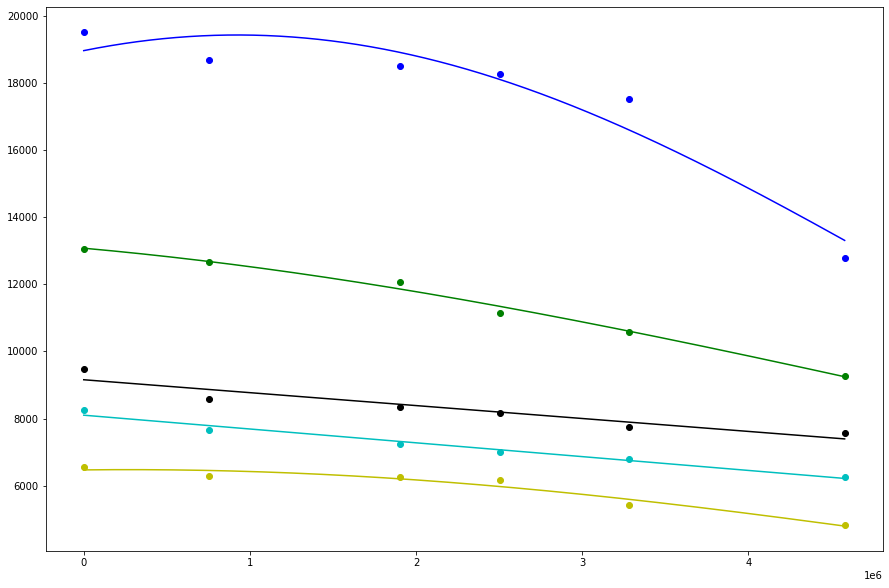

In [49]:
# Collating all the dispersion velocities for the observed and measured elements
OII = np.array([OII0217, OII0225, OII0311, OII0318, OII0327, OII0411])
MgI = np.array([MgI0217, MgI0225, MgI0311, MgI0318, MgI0327, MgI0411])
FeII1 = np.array([FeIIa0217, FeIIa0225, FeIIa0311, FeIIa0318, FeIIa0327, FeIIa0411])
SiII = np.array([SiII0217, SiII0225, SiII0311, SiII0318, SiII0327, SiII0411])
OI = np.array([OI0217, OI0225, OI0311, OI0318, OI0327, OI0411])
'''
print(OII)
print(MgI)
print(FeII1)
print(SiII)
print(OI)
'''
# Plotting the dispersion velocities against the Phase, 'T' array
plt.figure(figsize = (15,10))
plt.plot(t, OII, 'go', label='O II')
#plt.errorbar(T, OII, OIIyerr = )
plt.plot(t, MgI, 'bo', label='Mg I]')
plt.plot(t, FeII1, 'yo', label='Fe II')
plt.plot(t, SiII, 'co', label='Si II')
plt.plot(t, OI, 'ko', label='O I')

# apply curvefit to each of the velocity lines
# OII
x = t
p = np.linspace(0, max(t), 1000)
y = OII
# mean and sigma calculation
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])
plt.plot(p, Gauss(p, *popt), 'g-');
# MgI
x = t
p = np.linspace(0, max(t), 1000)
y = MgI
# mean and sigma calculation
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])
plt.plot(p, Gauss(p, *popt), 'b-');
# FeII
x = t
p = np.linspace(0, max(t), 1000)
y = FeII1
# mean and sigma calculation
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])
plt.plot(p, Gauss(p, *popt), 'y-');

# SiII
x = t
p = np.linspace(0, max(t), 1000)
y = SiII
def linfunc(x, m, c): 
    return m*x + c
p0 = np.array([])
popt, pcov = curve_fit(linfunc, x, y)
m= popt[0]
c= popt[1]
# plot fit
x_plot = np.linspace(min(x),max(x),1000)
plt.plot(x_plot, linfunc(x_plot, m, c), 'c-') 

# OI
x = t
p = np.linspace(0, max(t), 500)
y = OI
# mean and sigma calculation
def linfunc(x, m, c): 
    return m*x + c
p0 = np.array([])
popt, pcov = curve_fit(linfunc, x, y)
m= popt[0]
c= popt[1]
# plot fit
x_plot = np.linspace(min(x),max(x),1000)
plt.plot(x_plot, linfunc(x_plot, m, c), 'k-');

In [9]:
# Can find the distance from Earth to SN2015bn using its redshift = 0.1136
# Distance will be used to convert the flux to luminosity, as z > 1 we can use the relation v = cz
z = 0.1136
c = 3e8
v = c * z
# Converting Hubble constant to SI:
pc = 3.0857e16
H0 = ((70*1e3) /(pc*1e6))
# Using Hubble's Law to find the distance to the host galaxy of SN2015bn as D = v/H0, then converting in pc
D = v/H0
# Converting the mean flux for each dataset into luminosities using the inverse square law, F = L/4piD^2
def Lumfunc(F, D):
  return F*1e4 * ((4*np.pi) * (D**2))
Ly217 = Lumfunc(y217, D)
Ly225 = Lumfunc(y225, D)
Ly311 = Lumfunc(y311, D)
Ly318 = Lumfunc(y318, D)
Ly327 = Lumfunc(y327, D)
Ly411 = Lumfunc(y411, D)

In [10]:
print(np.where(Ly217 == max(Ly217)))
print(np.where(Ly225 == max(Ly225)))
print(np.where(Ly311 == max(Ly311)))
print(np.where(Ly318 == max(Ly318)))
print(np.where(Ly327 == max(Ly327)))
print(np.where(Ly411 == max(Ly411)))

b = 2.898e-3

def Wien(Wp):
  T = b/Wp
  return T

T217 = Wien(x217[63])*1e10
T225 = Wien(x225[21])*1e10
T311 = Wien(x311[19])*1e10
T318 = Wien(x318[10])*1e10
T327 = Wien(x327[0])*1e10
T411 = Wien(x411[19])*1e10
Tpeak = ([T217, T225, T311, T318, T327, T411])
print(Tpeak)

(array([63]),)
(array([21]),)
(array([19]),)
(array([10]),)
(array([0]),)
(array([19]),)
[8071.822949211591, 9415.585344795247, 9435.162846583948, 9538.706919982073, 9646.504258282219, 9436.114338126068]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


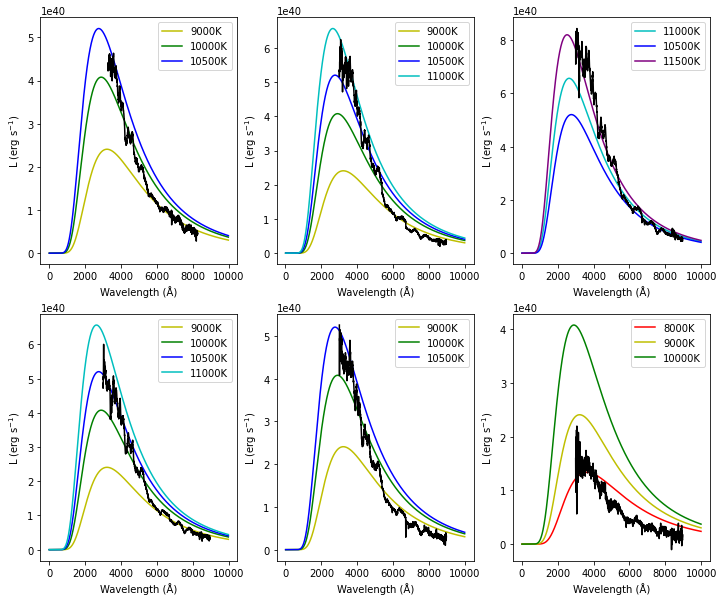

In [11]:
# Constants
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

# Plank function
def planck(W, T):
    a = 2.0*h*c**2
    b = h*c/(W*k*T)
    I = a/((W**5) * (np.exp(b) - 1.0))
    return I

# Generate wavelength range on x-axis
wav = np.arange(1e-9, 1e-6, 1e-9)

# Intensity
I8000 = planck(wav, 8000)
I9000 = planck(wav, 9000)
I10000 = planck(wav, 10000)
I10250 = planck(wav, 10250)
I10500 = planck(wav, 10500)
I10750 = planck(wav, 10750)
I11000 = planck(wav, 11000)
I11500 = planck(wav, 11500)
I12000 = planck(wav, 12000)

# Plotting luminosity against wavelength for each phase of the spectrum
plt.figure(figsize = (12,10))

plt.subplot(231)
plt.plot(wav*1e10, I9000*1e26, 'y-', label='9000K')
plt.plot(wav*1e10, I10000*1e26, 'g-', label='10000K')
plt.plot(wav*1e10, I10500*1e26, 'b-', label='10500K')
plt.plot(x217, Ly217, 'k')
plt.xlabel('Wavelength (Å)')
plt.ylabel('L (erg s$^{-1}$)')
plt.legend(loc='best')

plt.subplot(232)
plt.plot(wav*1e10, I9000*1e26, 'y-', label='9000K')
plt.plot(wav*1e10, I10000*1e26, 'g-', label='10000K')
plt.plot(wav*1e10, I10500*1e26, 'b-', label='10500K')
plt.plot(wav*1e10, I11000*1e26, 'c-', label='11000K')
plt.plot(x225, Ly225, 'k')
plt.xlabel('Wavelength (Å)')
plt.ylabel('L (erg s$^{-1}$)')
plt.legend(loc='best')

plt.subplot(233)
plt.plot(wav*1e10, I11000*1e26, 'c-', label='11000K')
plt.plot(wav*1e10, I10500*1e26, 'b-', label='10500K')
plt.plot(wav*1e10, I11500*1e26, 'purple', label='11500K')
plt.plot(x311, Ly311, 'k')
plt.xlabel('Wavelength (Å)')
plt.ylabel('L (erg s$^{-1}$)')
plt.legend(loc='best')

plt.subplot(234)
plt.plot(wav*1e10, I9000*1e26, 'y-', label='9000K')
plt.plot(wav*1e10, I10000*1e26, 'g-', label='10000K')
plt.plot(wav*1e10, I10500*1e26, 'b-', label='10500K')
plt.plot(wav*1e10, I11000*1e26, 'c-', label='11000K')
plt.plot(x318, Ly318, 'k')
plt.xlabel('Wavelength (Å)')
plt.ylabel('L (erg s$^{-1}$)')
plt.legend(loc='best')

plt.subplot(235)
plt.plot(wav*1e10, I9000*1e26, 'y-', label='9000K')
plt.plot(wav*1e10, I10000*1e26, 'g-', label='10000K')
plt.plot(wav*1e10, I10500*1e26, 'b-', label='10500K')
plt.plot(x327, Ly327, 'k')
plt.xlabel('Wavelength (Å)')
plt.ylabel('L (erg s$^{-1}$)')
plt.legend(loc='best')

plt.subplot(236)
plt.plot(wav*1e10, I8000*1e26, 'r-', label='8000K')
plt.plot(wav*1e10, I9000*1e26, 'y-', label='9000K')
plt.plot(wav*1e10, I10000*1e26, 'g-', label='10000K')
plt.plot(x411, Ly411, 'k')
plt.xlabel('Wavelength (Å)')
plt.ylabel('L (erg s$^{-1}$)')
plt.legend(loc='best');

In [12]:
# If we integrate under the blackbody curve it gives the overall luminosity of the SLSNe at that point
# Integrating under the blackbody curve using the trapezoidal rule:

# Integration
Intg8000 = np.trapz(I8000*1e26, wav*1e10)
Intg9000 = np.trapz(I9000*1e26, wav*1e10)
Intg10000 = np.trapz(I10000*1e26, wav*1e10)
Intg10250 = np.trapz(I10250*1e26, wav*1e10)
Intg10500 = np.trapz(I10500*1e26, wav*1e10)
Intg10750 = np.trapz(I10750*1e26, wav*1e10)
Intg11000 = np.trapz(I11000*1e26, wav*1e10)
Intg11500 = np.trapz(I11500*1e26, wav*1e10)
IntgBB = np.array([Intg10000, Intg11000, Intg11500, Intg10500, Intg10000, Intg8000])
print(IntgBB)


[1.64387265e+44 2.45360550e+44 2.95341560e+44 2.01902960e+44
 1.64387265e+44 6.30476475e+43]


8.912726351704774e+50


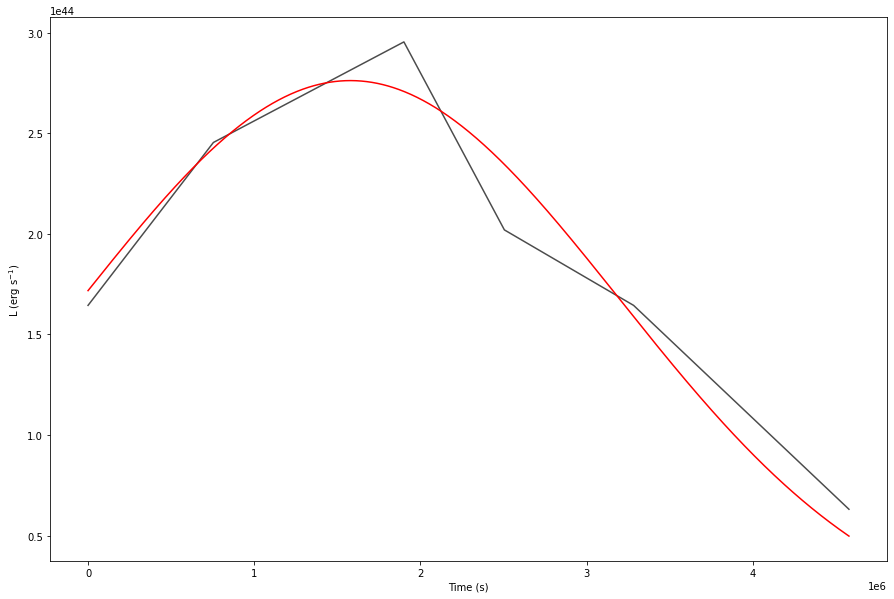

In [13]:
# Plotting the luminosity evolution over time will allow the determination of the total energy of the SLSNe
# The total energy can be found using the integral of the function fitted to the luminosity data
# Principally a crude approximation for the mass could be approximated using total energy, E = mc^2
Intsc = IntgBB/1e44
tsc = t/1e6
# Plotting the Luminosity evolution over time
plt.figure(figsize = (15,10))
#plt.plot(tsc, Intsc, 'k-', alpha = 0.7)
plt.plot(t, IntgBB, 'k-', alpha = 0.7)
plt.xlabel('Time (s)')
plt.ylabel('L (erg s$^{-1}$)');

# Curve fitting to the luminosity evolution
x = t
p = np.linspace(0, max(t), 1000)
y = IntgBB
#np.linspace(min(Intsc), max(Intsc), 1000)

# mean and sigma calculation
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])

plt.plot(p, Gauss(p, *popt), 'r-');

# If we want to find the total energy radiated, we integrate under the curve
IntgE = np.trapz(Gauss(x, *popt), x)
print(IntgE)

In [14]:
# Finding the peak bolometric magnitude of SN2015bn
# This can be computed using the Mbol equation: Mbol = -2.5*log10(L/L0)
# Mbol calculation
def bolM(L):
  #L0 is the zero point luminosity, given here in ergs^-1
  L0 = 3.0128e35
  Mbol = -2.5*np.log10(L/L0)
  return Mbol

Mbol8000 = bolM(Intg8000)
Mbol9000 = bolM(Intg9000)
Mbol10000 = bolM(Intg10000)
Mbol10500 = bolM(Intg10500)
Mbol11000 = bolM(Intg11000)
Mbol11500 = bolM(Intg11500)
Mbol = np.array([Mbol8000, Mbol9000, Mbol10000, Mbol10500, Mbol11000, Mbol11500])
print(Mbol)

[-20.80174646 -21.35543496 -21.84224467 -22.06543096 -22.27708608
 -22.47838565]


In [15]:
# We can investigate the radius of the expanding photosphere over time using the luminosities of the spectra
# The luminosities coupled with the 'nearest' blackbody temperature peak give radius using:
# L = 4pi * R^2 * sigma * T^4
# Rearrange for radius
# Constants
sigma = 5.67e-8

def stefanR(L, T):
  a = T**4
  b = L/(4*np.pi*sigma*a)
  R = b**0.5
  return R

R217 = stefanR(np.max(Ly217), 10250)
R225 = stefanR(np.max(Ly225), 10750)
R311 = stefanR(np.max(Ly311), 11500)
R318 = stefanR(np.max(Ly318), 10500)
R327 = stefanR(np.max(Ly327), 10250)
R411 = stefanR(np.max(Ly411), 8000)
R = np.array([R217, R225, R311, R318, R327, R411])
print(R)

R1 = stefanR(Intg10250, 10250)
R2 = stefanR(Intg10750, 10750)
R3 = stefanR(Intg11500, 11500)
R4 = stefanR(Intg10500, 10500)
R5 = stefanR(Intg10250, 10250)
R6 = stefanR(Intg8000, 8000)
Rn = np.array([R1, R2, R3, R4, R5, R6])
print(Rn)

[2.42682651e+15 2.56136930e+15 2.60190158e+15 2.63266120e+15
 2.58438371e+15 2.74352800e+15]
[1.52304619e+17 1.53036895e+17 1.53946614e+17 1.52684969e+17
 1.52304619e+17 1.46979920e+17]


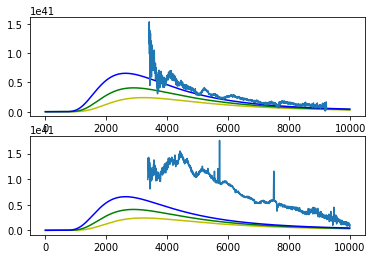

In [16]:
# We could repeat this process of other SLSNe of Type I, choosing them closest to maximum light
# SN2011kg_2012-01-09: Phase +3 days, z = 0.193
# SN2011ke_2011-05-15: Phase +8 days, z = 0.143

# Reading in SN2011kg
Wkg, Ikg = np.loadtxt('SN2011kg_2012-01-09.ascii', unpack = True,  dtype = float)
zkg = 0.193
vkg = c * z
Dkg = vkg/H0
Lykg = Lumfunc(Ikg, Dkg)
# Reading in SN2011ke
Wke, Ike = np.loadtxt('SN2011ke_2011-05-15.ascii', unpack = True,  dtype = float)
zke = 0.143
vke = c * zke
Dke = vke/H0
Lyke = Lumfunc(Ike, Dke)

# Overplotting the blackbody curves for each SLSNe
plt.subplot(211)
plt.plot(wav*1e10, I9000*1e26, 'y-', label='9000K')
plt.plot(wav*1e10, I10000*1e26, 'g-', label='10000K')
plt.plot(wav*1e10, I11000*1e26, 'b-', label='11000K')
plt.plot(Wkg, Lykg*1e1)

plt.subplot(212)
plt.plot(wav*1e10, I9000*1e26, 'y-', label='9000K')
plt.plot(wav*1e10, I10000*1e26, 'g-', label='10000K')
plt.plot(wav*1e10, I11000*1e26, 'b-', label='11000K')
plt.plot(Wke, Lyke*1e1)

# explore this further, use: https://iopscience.iop.org/article/10.1088/0004-637X/796/2/87/meta#apj503149s2
# and the table inside this paper as references, download and plot some of the spectra from wiserep
# list bolometric magnitude, temp and redshift, compare to SN2015bn and discuss/compare my values and the paper's

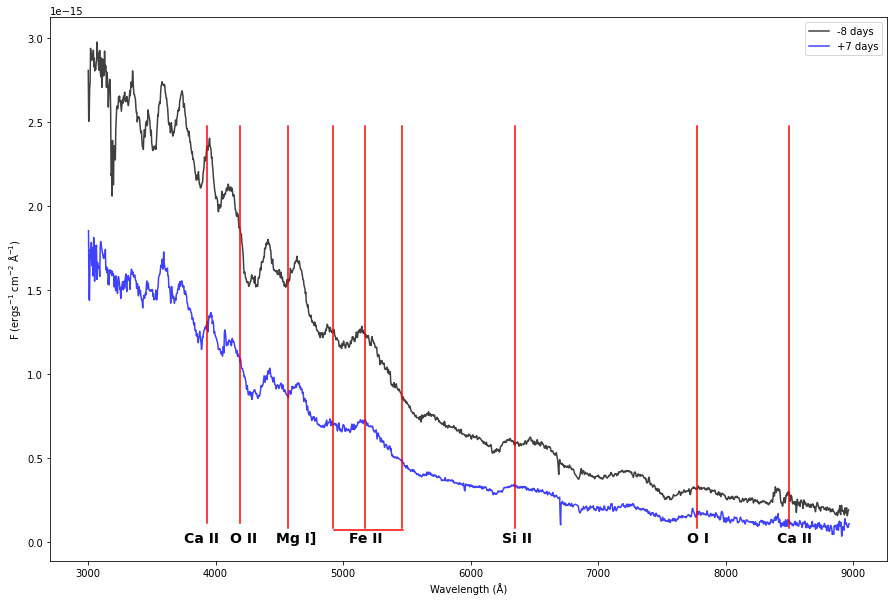

In [17]:
# Code to plot absorption feature indicators

plt.figure(figsize = (15,10))
plt.plot(x311, y311, 'k-', alpha = 0.75, label = '-8 days')
plt.plot(x327, y327, 'b-', alpha = 0.75, label = '+7 days')
plt.xlabel('Wavelength (Å)')
plt.ylabel('F (erg$s^{-1}$ cm$^{-2}$ Å$^{-1}$)')

plt.axvline(x = 3934.78, ymin = 0.07, ymax = 0.8, color = 'red')
plt.axvline(x = 4189.79, ymin = 0.07, ymax = 0.8, color = 'red')
plt.axvline(x = 4571, ymin = 0.06, ymax = 0.8, color = 'red')
plt.axvline(x = 4925, ymin = 0.06, ymax = 0.8, color = 'red')
plt.axvline(x = 5169, ymin = 0.06, ymax = 0.8, color = 'red')
plt.axvline(x = 5465, ymin = 0.06, ymax = 0.8, color = 'red')
plt.axvline(x = 6347, ymin = 0.06, ymax = 0.8, color = 'red')
plt.axvline(x = 7775, ymin = 0.06, ymax = 0.8, color = 'red')
plt.axvline(x = 8498, ymin = 0.06, ymax = 0.8, color = 'red')

plt.axhline(y = 0.075e-15, xmin = 0.3385, xmax = 0.4218, color = 'red')

plt.text(x = 3750, y = 0, s = 'Ca II', fontsize = 14, fontweight = 'bold')
plt.text(x = 4110, y = 0, s = 'O II', fontsize = 14, fontweight = 'bold')
plt.text(x = 4475, y = 0, s = 'Mg I]', fontsize = 14, fontweight = 'bold')
plt.text(x = 5050, y = 0, s = 'Fe II', fontsize = 14, fontweight = 'bold')
plt.text(x = 6250, y = 0, s = 'Si II', fontsize = 14, fontweight = 'bold')
plt.text(x = 7700, y = 0, s = 'O I', fontsize = 14, fontweight = 'bold')
plt.text(x = 8400, y = 0, s = 'Ca II', fontsize = 14, fontweight = 'bold')

plt.legend(loc='best');


In [35]:
# Error analysis
# Use the wiserep datasets to find the difference between there's and mine. Run this difference through my code to determine errors in flux --> luminosity --> magnitude?
# Errors for measured elements are standard error of the mean, so can propagate this to errors of velocity
# Reading in wiserep data
Wx217, Wy217 = np.loadtxt('2015bn_2015-02-17.txt',unpack = True,  dtype = float)
Wx225, Wy225 = np.loadtxt('2015bn_2015-02-25.txt',unpack = True,  dtype = float)
Wx311, Wy311 = np.loadtxt('2015bn_2015-03-11.txt',unpack = True,  dtype = float)
Wx318, Wy318 = np.loadtxt('2015bn_2015-03-18.txt',unpack = True,  dtype = float)
Wx327, Wy327 = np.loadtxt('2015bn_2015-03-27.txt',unpack = True,  dtype = float)
Wx411, Wy411 = np.loadtxt('2015bn_2015-04-11.txt',unpack = True,  dtype = float)

# Finding the difference between the reduced data and the wiserep data
Ex217 = x217 - Wx217
Ex225 = x225 - Wx225[:-2]
Ex311 = x311 - Wx311
Ex318 = x318 - Wx318[:-2]
Ex327 = x327[:-1] - Wx327
Ex411 = x411[:-5] - Wx411

Ey217 = y217 - Wy217
Ey225 = y225 - Wy225[:-2]
Ey311 = y311 - Wy311
Ey318 = y318 - Wy318[:-2]
Ey327 = y327[:-1] - Wy327
Ey411 = y411[:-5] - Wy411

In [ ]:
'''
# A comparison between the SLSNe 
# SN2011kg, SN2015bn, SN2011ke, H-poor
# SN2013hx, SN2006gy, H-rich

# Reading in SN2011kg
Wkg0109, Ikg0109 = np.loadtxt('SN2011kg_2012-01-09.ascii', unpack = True,  dtype = float)
# Reading in SN2011ke
Wke0515, Ike0515 = np.loadtxt('SN2011ke_2011-05-15.ascii', unpack = True,  dtype = float)
# Reading in SN2013hx
Whx0220, Ihx0220 = np.loadtxt('SN2013hx_2014-02-20.asci', unpack = True, dtype = float)
# Reading in SN2006gy
Whx0925, Ihx0925 = np.loadtxt('SN2006gy_2006-09-25.txt', unpack = True, dtype = float)
Ihx0925a = Ihx0925*1e-16

plt.figure(figsize = (15,10))
plt.xlabel('Wavelength (Å)')
plt.ylabel('log$_{10}$(F) + Constant')

plt.plot(x327, np.log10(y327)+0.5, 'b', label= 'SN2015bn, +7d')
plt.plot(Wkg0109, np.log10(Ikg0109)+1.5, 'r', label= 'SN2011kg, +3d')
plt.plot(Wke0515, np.log10(Ike0515)-1, 'y', label= 'SN2011ke, +8d')
plt.plot(Whx0220, np.log10(Ihx0220)-1.5, 'c', label= 'SN2011hx, +20d')
plt.plot(Whx0925, (np.log10(Ihx0925a)-0.5), 'g', label= 'SN2006gy, +7d')

plt.legend(loc='best')
plt.xlim(3500, 9500)
#plt.ylim(-38, -33.8)
;
'''